# 최적화 함수 (Optimizer)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 간단한 SGD

In [3]:
data_sample = np.random.uniform(-2, 2, size=10)

def loss(x):
    return x**2


def gradient(x):
    return 2*x

In [4]:
def sgd(lr=0.1, epochs=10):
    w = np.random.uniform(-2,2) # 초기 random 값
    history = [w] # 변화 보려고 배열에 weight 넣어둠
    
    for _ in range(epochs):
        sample = np.random.choice(data_sample) # 위에 만든 data_sample에서 랜덤하게 하나 뽑음 (원래는 비복원 추출 학습)
        grad = gradient(sample)
        w -= lr*grad
        history.append(w)
            
    return history

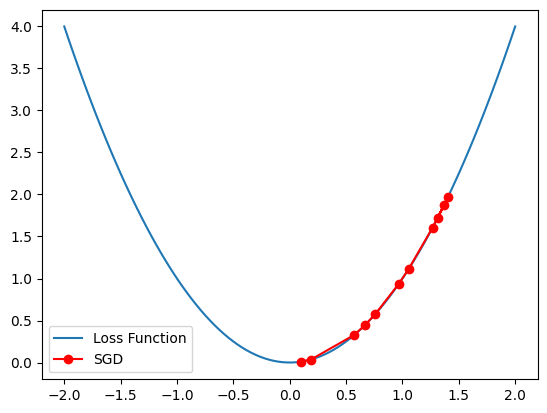

In [5]:
history = sgd()

x_vals = np.linspace(-2,2,100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(history, loss(np.array(history)), 'ro-', label='SGD')

plt.legend()
plt.show()

## Momentum 추가

In [6]:
def sgd_momentum(lr=0.1, momentum=0.9, epochs=10):
    w = np.random.uniform(-2,2) # 초기 random 값
    v = 0 # 초기 속도 0으로 초기화
    history = [w] # 변화 보려고 배열에 weight 넣어둠
    
    for _ in range(epochs):
        sample = np.random.choice(data_sample) # 위에 만든 data_sample에서 랜덤하게 하나 뽑음 (원래는 비복원 추출 학습)
        grad = gradient(sample)
        v = momentum*v - lr*grad
        w += v
        history.append(w)
            
    return history

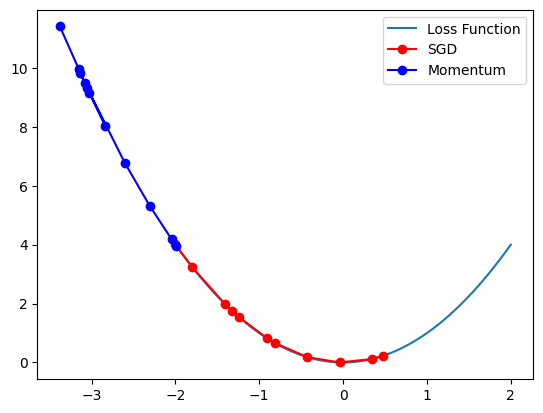

In [7]:
sgd_history = sgd()
momentum_history = sgd_momentum()

x_vals = np.linspace(-2,2,100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(momentum_history, loss(np.array(momentum_history)), 'bo-', label='Momentum')

plt.legend()
plt.show()

## 학습률에 따른 SGD
- 학습률 변화에 따른 가중치 변화 확인해보기

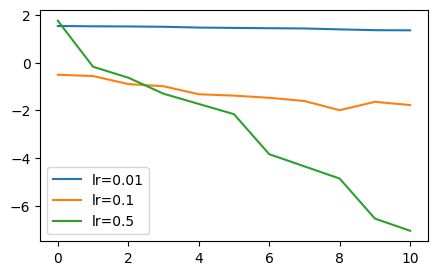

In [8]:
learning_rates = [0.01, 0.1, 0.5]
histories = [sgd(lr=lr) for lr in learning_rates]

plt.figure(figsize=(5,3))
for i, history in enumerate(histories):
    plt.plot(history, label=f'lr={learning_rates[i]}')

plt.legend()
plt.show()

## AdaGrad
- 이전 기울기의 값을 누적해서, 학습률에 영향을 줌 (기울기 이동이 많았을 수록, 학습률 줄임)

In [9]:
def adagrad(lr=0.1, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2,2)
    h = 0
    history = [w]
    
    for _ in range(epochs):
        grad = gradient(w)
        h += grad ** 2
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)
    
    return history

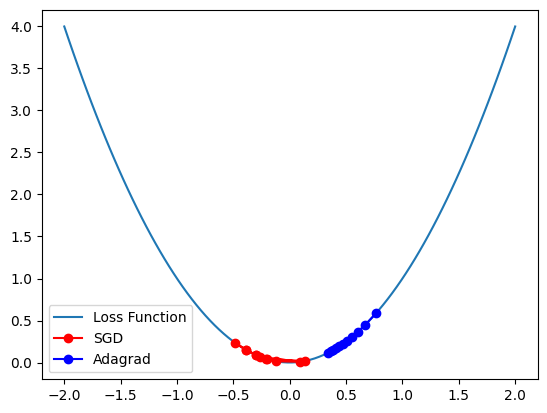

In [10]:
sgd_history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2,2,100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='Adagrad')

plt.legend()
plt.show()

## RMSProp

In [11]:
def rmsprop(lr=0.1, beta=0.9, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2,2)
    h = 0
    history = [w]
    
    for _ in range(epochs):
        grad = gradient(w)
        h += beta*h + ((1-beta) * grad**2)
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)
    
    return history

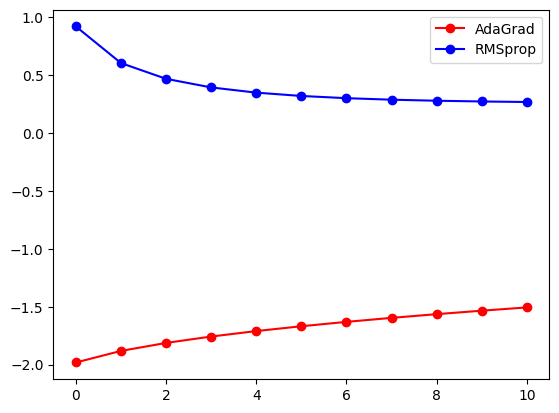

In [12]:
adagrad_history = adagrad()
rmsprop_history = rmsprop()

plt.plot(range(11), adagrad_history, 'ro-', label='AdaGrad')
plt.plot(range(11), rmsprop_history, 'bo-', label='RMSprop')
plt.legend()
plt.show()

## Adam

In [13]:
def adam(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2,2)
    m, v = 0, 0
    history = [w]
    
    for t in range(1,epochs+1):
        grad = gradient(w)
        
        m = beta1*m + (1-beta1)*grad
        v = beta2*v + (1-beta2)*grad**2
        m_hat = m / (1 - beta1**t) # 보정치
        v_hat = v / (1 - beta2**t) # 보정치
        w -= (lr / (np.sqrt(v_hat)+epsilon)) * m_hat
    
        history.append(w)
    
    
    return history

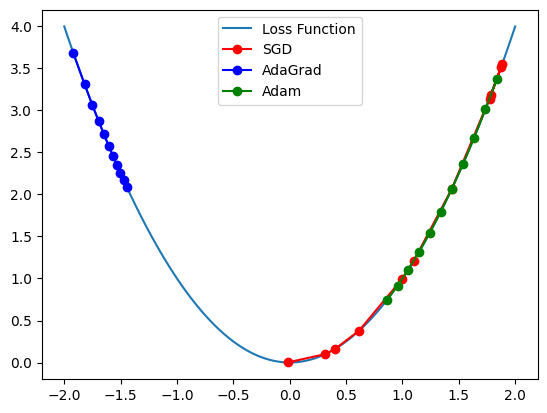

In [14]:
sgd_history = sgd()
adagrad_history = adagrad()
adam_history = adam()

x_vals = np.linspace(-2,2,100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdaGrad')
plt.plot(adam_history, loss(np.array(adam_history)), 'go-', label='Adam')

plt.legend()
plt.show()

# PyTorch 활용 > SGD vs Adam 비교

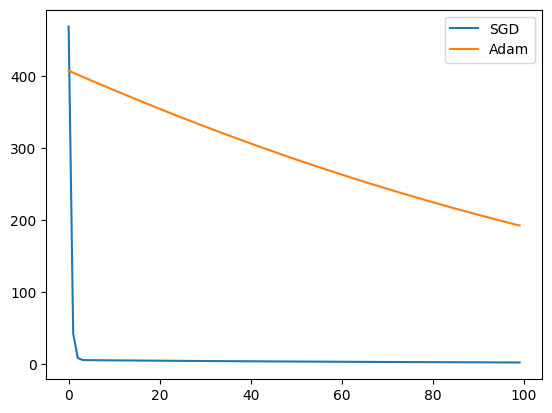

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)

X = torch.rand(100,1) * 10
y = 3*X + 5 + (torch.randn(100,1) * 0.3)

model_sgd = nn.Linear(1,1)
model_adam = nn.Linear(1,1)

criterion = nn.MSELoss()
optim_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optim_adam = optim.Adam(model_adam.parameters(), lr=0.01)

epochs = 100
losses_sgd =[]
losses_adam = []

for epoch in range(epochs):
    optim_sgd.zero_grad() # 기울기 초기화
    outputs = model_sgd(X) # 예측값 구하기
    loss = criterion(outputs, y) # 손실 계산
    loss.backward() # 역전파
    optim_sgd.step() # 가중치 업뎃
    losses_sgd.append(loss.item()) # 시각화 위한 손실 저장
    
    
for epoch in range(epochs):
    optim_adam.zero_grad() # 기울기 초기화
    outputs = model_adam(X) # 예측값 구하기
    loss = criterion(outputs, y) # 손실 계산
    loss.backward() # 역전파
    optim_adam.step() # 가중치 업뎃
    losses_adam.append(loss.item()) # 시각화 위한 손실 저장
    

plt.plot(losses_sgd, label='SGD')
plt.plot(losses_adam, label='Adam')
plt.legend()
plt.show()

## 종합 실습

In [16]:
# 1. 활성화 함수 및 손실 함수 정의
def relu(z):
    return np.maximum(0,z)

def relu_d(z):
    return np.where(z>0, 1, 0)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True) 

def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true* np.log(y_pred + 1e-7)) / y_true.shape[0]

In [17]:
# 2. 학습 데이터 준비 (5x5 픽셀 숫자)
digits = {
    "0": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),
    "1": np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0]]).flatten(),
}

X = np.array([digits['0'], digits['1']])
y = np.array([[1,0], [0,1]])

In [18]:
# 3. 신경망 구조 설정
input_size = 25
hidden_size = 10
output_size = 2

In [19]:
# 가중치 초기화 (He 초기화)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1,hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros((1,output_size))

In [20]:
# 4. 학습 (역전파 + SGD 최적화)
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    # 순전파
    Z1 = np.dot(X, W1) + b1
    R1 = relu(Z1)
    Z2 = np.dot(R1, W2) + b2
    probs = softmax(Z2)
    
    # 손실 계산
    loss = cross_entropy_loss(y, probs)
    
    # 역전파
    m  = X.shape[0] # number of samples (for division to make average gradient)
    
    dZ2 = (probs - y) 
    dW2 = np.dot(R1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dR1 = np.dot(dZ2, W2.T)
    dZ1 = dR1 * relu_d(Z1) 
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    # 가중치 업데이트
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    # epoch 100번째마다 손실 출력
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1} Loss: {loss:.4f}")

Epoch 100 Loss: 0.1230
Epoch 200 Loss: 0.0503
Epoch 300 Loss: 0.0284
Epoch 400 Loss: 0.0189
Epoch 500 Loss: 0.0138
Epoch 600 Loss: 0.0107
Epoch 700 Loss: 0.0087
Epoch 800 Loss: 0.0072
Epoch 900 Loss: 0.0062
Epoch 1000 Loss: 0.0054


In [21]:
# 5. 예측 테스트
def predict(test_digit):
    Z1 = np.dot(test_digit, W1) + b1
    R1 = relu(Z1)
    Z2 = np.dot(R1, W2) + b2
    probs = softmax(Z2)
    
    predicted_class = np.argmax(probs, axis=1)
    return predicted_class



test_digit = np.array([[0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0]]).flatten().reshape(1, -1)



print('예측 결과 값:', predict(test_digit))

예측 결과 값: [1]


In [22]:
# 1. 활성화 함수 및 손실 함수 정의
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-7)) / y_true.shape[0]

# 2. 학습 데이터 준비 (5x5 픽셀 숫자)
digits = {
    "0": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),
    "1": np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0]]).flatten(),
    "8": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),
}

X = np.array([digits["0"], digits["1"], digits["8"]])
y_labels = np.array([0, 1, 2])

# one-hot 인코딩
y = np.zeros((y_labels.size, 3))
y[np.arange(y_labels.size), y_labels] = 1

# 3. 신경망 구조 설정
input_size = 25
hidden_size = 10
output_size = 3

# 가중치 초기화 (He 초기화)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros((1, output_size))

# 4. 학습 (역전파 + SGD 최적화)
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    # 순전파
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    # 손실 계산
    loss = cross_entropy_loss(y, A2)

    # 역전파
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_d(Z1)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    # 가중치 업데이트
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    # epoch 100번째마다 손실 출력
    if epoch % 100 == 0:
        print(f'Epoch { epoch }: Loss {loss:.4f}')

# 5. 예측 테스트
def predict(x):
    Z1 = np.dot(x, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return np.argmax(A2, axis=1)

test_digit = np.array([[0, 1, 1, 1, 0],
                        [1, 0, 0, 0, 1],
                        [0, 1, 1, 1, 0],
                        [1, 0, 0, 0, 1],
                        [0, 1, 1, 1, 0]]).flatten().reshape(1, -1)
print("예측 결과 값:", ["0", "1", "8"][predict(test_digit)[0]])

Epoch 0: Loss 2.4322
Epoch 100: Loss 0.4640
Epoch 200: Loss 0.2584
Epoch 300: Loss 0.1578
Epoch 400: Loss 0.1037
Epoch 500: Loss 0.0732
Epoch 600: Loss 0.0548
Epoch 700: Loss 0.0428
Epoch 800: Loss 0.0346
Epoch 900: Loss 0.0288
예측 결과 값: 8
